In [1]:
%matplotlib inline
import Euclid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.table import Table
from astropy import units as u
from astropy.units import photometric

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
t = Table.read('/home/aalvarez/Work/Data/SC7/MER_PHZ_TU-4208.fits')

In [13]:
snr = t['FLUX_VIS_APER'] / t['FLUXERR_VIS_APER'] > 10
t = t[snr]

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [15]:
idx = np.arange(len(t))
np.random.shuffle(idx)
t = t[idx[:10000]]

## Bands used in NNPZ

In [16]:
target_catalog_filters = [
    ('FLUX_U_EXT_OMEGACAM_APER', 'FLUXERR_U_EXT_OMEGACAM_APER'),
    ('FLUX_G_EXT_OMEGACAM_APER', 'FLUXERR_G_EXT_OMEGACAM_APER'),
    ('FLUX_R_EXT_OMEGACAM_APER', 'FLUXERR_R_EXT_OMEGACAM_APER'),
    ('FLUX_I_EXT_OMEGACAM_APER', 'FLUXERR_I_EXT_OMEGACAM_APER'),
    ('FLUX_VIS_APER', 'FLUXERR_VIS_APER'),
    ('FLUX_Y_APER', 'FLUXERR_Y_APER'),
    ('FLUX_J_APER', 'FLUXERR_J_APER'),
    ('FLUX_H_APER', 'FLUXERR_H_APER')
]
n_filters = len(target_catalog_filters)

## Flux vs Error

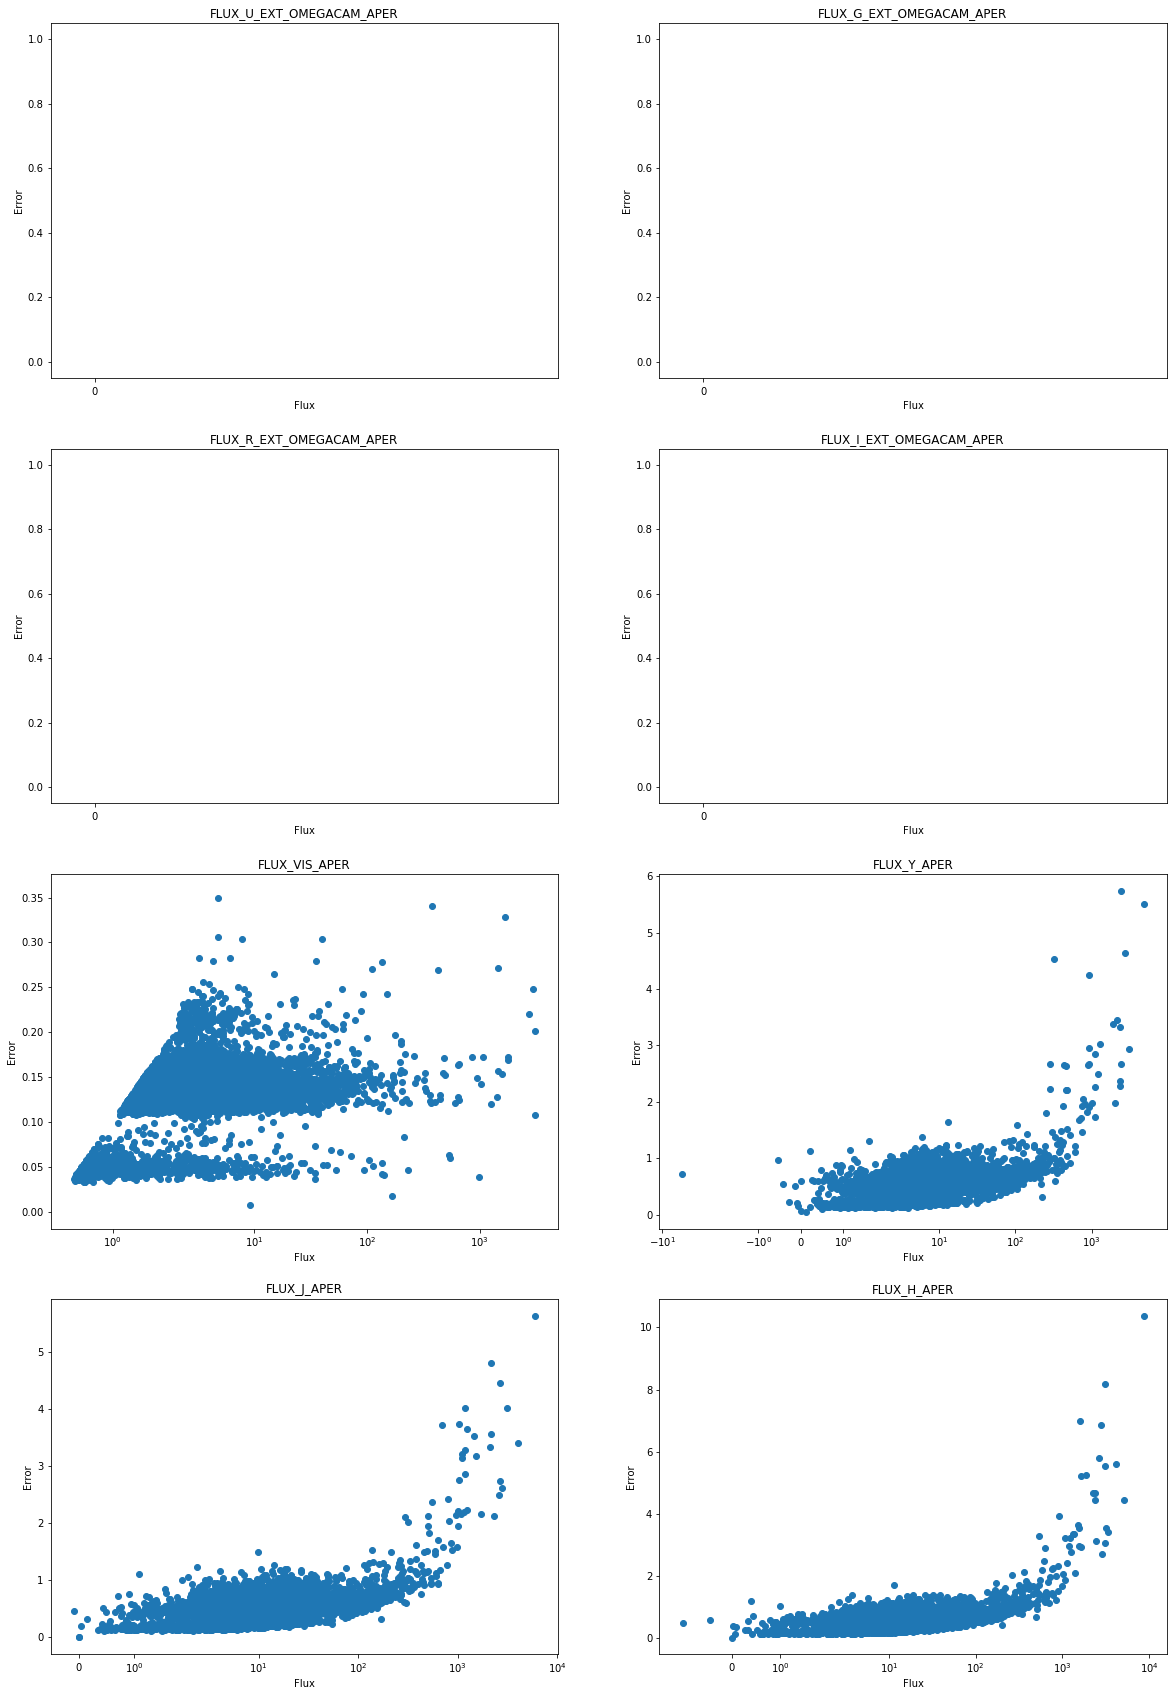

In [18]:
ncols = 2
nrows = n_filters // ncols

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
axes = axes.ravel()

for i, (flux, error) in enumerate(target_catalog_filters):
    axes[i].scatter(t[flux], t[error])
    axes[i].set_title(flux)
    axes[i].set_xscale('symlog')
    axes[i].set_xlabel('Flux')
    axes[i].set_ylabel('Error')